# Studying mobility changes due to covid 19 political measures

#### rapid first glance on the Google mobility data
input:
- df as Google_mobility_raw_df
- df_param as Google_mobility_fit_df_param 

no output

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

In [2]:
url = "https://raw.githubusercontent.com/sylvainhislaire/projects/master/Google_Mobility_raw_df.csv"
df = pd.read_csv(url, header = [0,1], index_col = [0])
df

Country           Afghanistan                                        \
Sector     Grocery & pharmacy Parks Residential Retail & recreation   
date                                                                  
2020-02-15              -10.0   0.0        -5.0                -9.0   
2020-02-16               11.0   1.0        -0.0                 3.0   
2020-02-17               11.0   2.0         1.0                 6.0   
2020-02-18                5.0   3.0         1.0                 3.0   
2020-02-19                3.0   1.0        -1.0                -1.0   
...                       ...   ...         ...                 ...   
2020-04-13              -27.0 -13.0       -14.0               -46.0   
2020-04-14              -32.0 -14.0       -15.0               -48.0   
2020-04-15              -31.0 -10.0       -14.0               -42.0   
2020-04-16              -34.0 -13.0       -16.0               -46.0   
2020-04-17              -21.0 -12.0       -11.0               -41.0   

Country                                           Angola                    \
Sector     Transit stations Workplace Grocery & pharmacy Parks Residential   
date                                                                         
2020-02-15             -2.0     -28.0               -2.0   7.0        -1.0   
2020-02-16             10.0       4.0                0.0 -11.0        -2.0   
2020-02-17              9.0       5.0               -4.0   2.0        -0.0   
2020-02-18              9.0       6.0               -4.0  -4.0         1.0   
2020-02-19              0.0       5.0              -12.0  -3.0        -1.0   
...                     ...       ...                ...   ...         ...   
2020-04-13            -51.0     -41.0              -40.0 -39.0       -29.0   
2020-04-14            -52.0     -42.0              -35.0 -40.0       -27.0   
2020-04-15            -51.0     -42.0              -40.0 -41.0       -29.0   
2020-04-16            -51.0     -39.0              -34.0 -36.0       -25.0   
2020-04-17            -51.0     -13.0              -37.0 -43.0       -31.0   

Country                         ...      Zambia                      \
Sector     Retail & recreation  ... Residential Retail & recreation   
date                            ...                                   
2020-02-15                 3.0  ...        -4.0                -1.0   
2020-02-16                -4.0  ...        -3.0                -4.0   
2020-02-17                -6.0  ...        -3.0                -8.0   
2020-02-18                -3.0  ...        -2.0                -6.0   
2020-02-19               -10.0  ...        -3.0                -8.0   
...                        ...  ...         ...                 ...   
2020-04-13               -55.0  ...       -21.0               -32.0   
2020-04-14               -52.0  ...       -11.0               -16.0   
2020-04-15               -54.0  ...       -13.0               -19.0   
2020-04-16               -52.0  ...       -12.0               -18.0   
2020-04-17               -56.0  ...       -13.0               -23.0   

Country                                         Zimbabwe                    \
Sector     Transit stations Workplace Grocery & pharmacy Parks Residential   
date                                                                         
2020-02-15             -5.0       7.0                0.0  -1.0        -1.0   
2020-02-16             -7.0       2.0               -3.0  -6.0        -3.0   
2020-02-17             -8.0       8.0               -2.0  -1.0        -1.0   
2020-02-18             -4.0       6.0                4.0   0.0        -2.0   
2020-02-19             -7.0       4.0                1.0  -4.0        -1.0   
...                     ...       ...                ...   ...         ...   
2020-04-13            -32.0     -51.0              -63.0 -51.0       -49.0   
2020-04-14            -20.0     -16.0              -53.0 -47.0       -41.0   
2020-04-15            -25.0     -18.0              -50.0 -5

In [3]:
url = "https://raw.githubusercontent.com/sylvainhislaire/projects/master/Google_Mobility_fit_df_param.csv"
df_param = pd.read_csv(url, header = [0,1], index_col = [0])
df_param

Country               Afghanistan                                             \
Sector         Grocery & pharmacy      Parks Residential Retail & recreation   
parameters                                                                     
acuteness               10.000000   0.624789    0.284801            0.319800   
transition day          41.857616  40.362680   41.173570           39.386526   
intensity              -29.895426 -14.646242  -12.959441          -46.476161   
offset                   4.095363   2.463956   -0.674879            0.798643   
error                   32.298828   5.601513    3.371539           18.888179   

Country                                                Angola             \
Sector         Transit stations  Workplace Grocery & pharmacy      Parks   
parameters                                                                 
acuteness              0.209542   3.089872          10.000000   0.323832   
transition day        38.719832  41.621038          40.946044  37.074623   
intensity            -52.000000 -35.980899         -37.516984 -45.320953   
offset                 4.622126   1.085921           1.707271   4.925963   
error                 22.668155  90.130409          52.949917  42.287646   

Country                                         ...      Zambia  \
Sector         Residential Retail & recreation  ... Residential   
parameters                                      ...               
acuteness         0.420756            3.043538  ...    0.245632   
transition day   37.654515           40.501179  ...   41.888258   
intensity       -27.296113          -51.716102  ...  -11.148057   
offset           -0.171635           -3.703236  ...   -2.364054   
error            15.765583           77.804041  ...    5.859250   

Country                                                          \
Sector         Retail & recreation Transit stations   Workplace   
parameters                                                        
acuteness                 0.200000         0.200000    0.200000   
transition day           41.499351        41.417020   44.821920   
intensity               -22.289023       -21.916520  -27.602718   
offset                    0.170077        -3.577105    4.490555   
error                    35.274266        18.709830  123.015129   

Country                  Zimbabwe                                             \
Sector         Grocery & pharmacy      Parks Residential Retail & recreation   
parameters                                                                     
acuteness               10.000000   0.468455    0.498078           10.000000   
transition day          43.519254  42.017633   41.400674           43.415239   
intensity              -60.424010 -46.444337  -40.921894          -63.639418   
offset                   5.093659  -3.868086   -1.326554           -2.683319   
error                   33.668760  35.943083   21.148464           41.060552   

Country                                      
Sector         Transit stations   Workplace  
parameters                                   
acuteness             10.000000    0.599979  
transition day        43.584050   42.457331  
intensity            -65.611296  -68.743481  
offset               -13.860382    4.346077  
error                 43.221788  193.039495  

[5 rows x 775 columns]

In [4]:
sectors = list(df_param.groupby('Sector',axis=1).min().columns.get_level_values('Sector'))
countries = list(df_param.groupby('Country',axis=1).min().columns.get_level_values('Country'))
sectors

['Grocery & pharmacy',
 'Parks',
 'Residential',
 'Retail & recreation',
 'Transit stations',
 'Workplace']

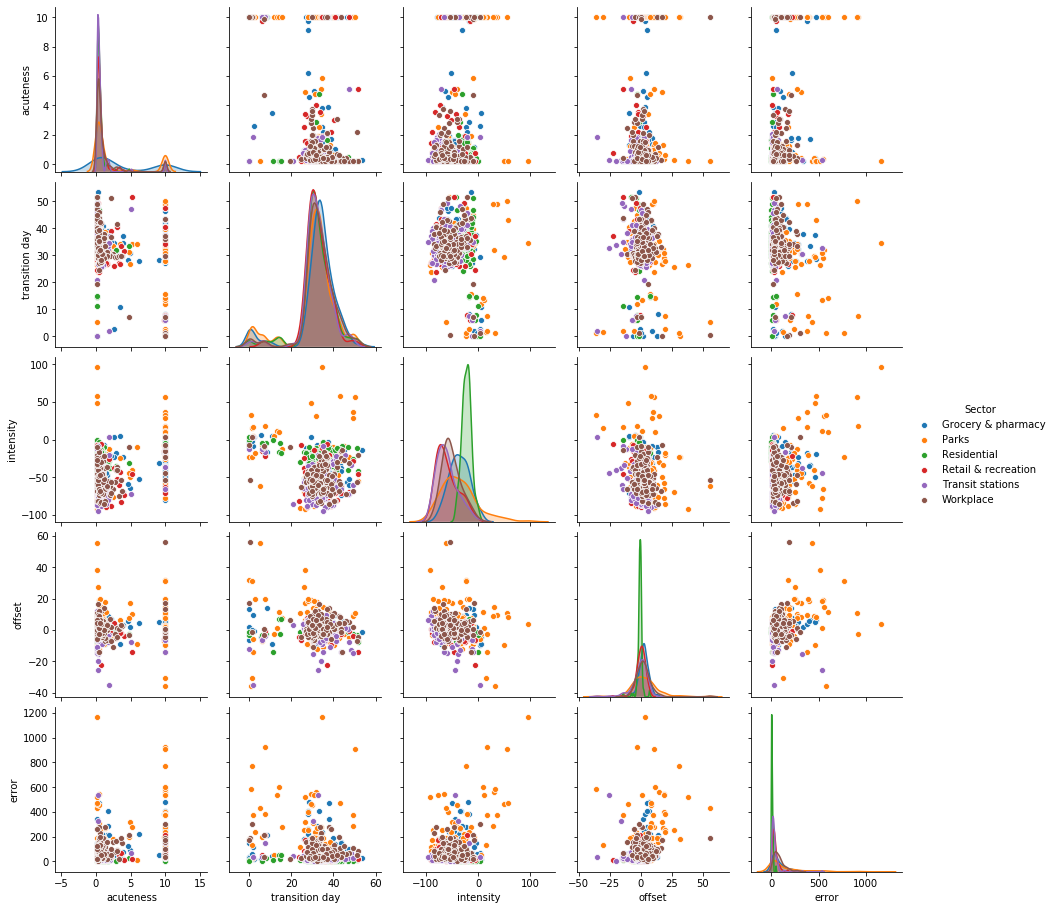

In [5]:
import seaborn as sbs
df_param_reset = df_param.transpose().reset_index()
sbs.pairplot(data = df_param_reset[['acuteness','transition day','intensity','offset', 'error','Sector']], hue = 'Sector')

In [6]:
fig = make_subplots(rows=3, cols=2,subplot_titles=sectors)
rows = [1,1,2,2,3,3]
cols = [1,2,1,2,1,2]
count = 0
for sector in sectors: 
    fig.add_trace(go.Scatter(x=list(df_param.xs(sector,level=1,axis=1).xs('acuteness',axis=0)), #l=acuteness
                             y=list(df_param.xs(sector,level=1,axis=1).xs('transition day',axis=0)), #m=transition date
                             mode = "markers",
                             showlegend = False,
                             text=countries),
                  row=rows[count], 
                  col=cols[count])

    # Update axis properties
    fig.update_xaxes(title_text="acuteness",row=rows[count],col=cols[count])
    fig.update_yaxes(title_text="transition day",row=rows[count],col=cols[count])

    count += 1

fig.update_layout(height=900, width=1000,title_text="Length and day of the transition for each sector")
fig.show()

In [7]:
fig = go.Figure()
print('caveat: Residential has changed sign on intensity')
for sector in sectors: 
    hover = []
    for country in countries:
        hover.append(country + ', ' + sector)
    fig.add_trace(go.Scatter(x=list(df_param.xs(sector,level=1,axis=1).xs('transition day',axis=0)), #l=acuteness
                             y=list(df_param.xs(sector,level=1,axis=1).xs('intensity',axis=0)),
                             mode = "markers",
                             name = sector,
                             text = hover))

# Update axis and figure properties 
fig.update_xaxes(range=[0, len(df.index)]) # m from 0 to numbe of days
fig.update_yaxes(range=[-100,100])
fig.update_xaxes(title_text="transition date")
fig.update_yaxes(title_text="intensity")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_layout(height=600, width=800,title_text="Day and intensity of change of the transition for each sector")
           
fig.show()

caveat: Residential has changed sign on intensity


In [8]:
fig = go.Figure()
for sector in sectors: 
    hover = []
    for country in countries:
        hover.append(country + ', ' + sector)
    fig.add_trace(go.Scatter(x=list(df_param.xs(sector,level=1,axis=1).xs('acuteness',axis=0)), 
                             y=list(df_param.xs(sector,level=1,axis=1).xs('error',axis=0)),
                             mode = "markers",
                             name = sector,
                             text=hover))

# Update axis and figure properties 
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.update_xaxes(range=[0, 1.01]) # m from 0 to numbe of days
fig.update_yaxes(range=[0,3])
fig.update_xaxes(title_text="acuteness")
fig.update_yaxes(title_text="error")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_layout(height=600, width=800,title_text="Day and intensity of change of the transition for each sector")
           
fig.show()

In [9]:
px.scatter(df_param,
          x = df_param.xs('Grocery & pharmacy',axis=1,level=1).loc['intensity'],
          y = df_param.xs('Workplace',axis=1,level=1).loc['intensity'])

In [10]:
# this one would be much cuter with colors standing for continents
fig = go.Figure()
for country in countries: 
    hover = []
    for sector in sectors:
        hover.append(country + ', ' + sector)
    fig.add_trace(go.Scatter(x=list(df_param.xs(country,level=0,axis=1).xs('transition day',axis=0)), #l=acuteness
                             y=list(df_param.xs(country,level=0,axis=1).xs('acuteness',axis=0)),
                             mode = "markers",
                             name = country,
                             text=hover))


fig.update_xaxes(range=[0,60]) # m from 0 to numbe of days
fig.update_xaxes(title_text="transition day")
fig.update_yaxes(title_text="acuteness")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_layout(height=600, width=800,title_text="Day and intensity of change of the transition for each sector")
           
fig.show()